# 四大行价差套利研究

In [1]:
from jqdata import *


# 主要选择工商银行和建设银行进行研究
# 工商银行
code = '601398.XSHG'
start_date = datetime.date(2015, 1, 5)
end_date = datetime.date(2019, 6, 10)
price_df = get_price(code, start_date=start_date, end_date=end_date, frequency='daily', 
                      fields=[ 'open', 'high', 'low', 'close'], skip_paused=False, fq='pre', count=None)
# code2 = '601288.XSHG' 建设银行
code2 = '601939.XSHG'
# code2 = '601988.XSHG'
price_df2 = get_price(code2,start_date=start_date, end_date=end_date, frequency='daily', 
                      fields=[ 'open', 'high', 'low', 'close'], skip_paused=False, fq='pre', count=None)

In [4]:
df=price_df.merge(price_df2,left_index=True, right_index=True)
df.head()

,open_x,high_x,low_x,close_x,open_y,high_y,low_y,close_y
2015-01-05,3.93,4.10,3.90,4.03,5.35,5.56,5.28,5.48
2015-01-06,3.98,4.27,3.94,4.06,5.38,5.72,5.35,5.40
2015-01-07,3.98,4.06,3.94,4.01,5.30,5.38,5.16,5.25
2015-01-08,4.02,4.04,3.82,3.85,5.27,5.31,4.99,5.03
2015-01-09,3.84,4.10,3.77,3.89,5.03,5.36,4.93,5.07


In [7]:
# a=['601398.XSHG','601288.XSHG', '601939.XSHG']

In [8]:
# from jqdata import *
# def date_pe(code,count=100):
#     b=get_trade_days(count=count)
#     q=query(valuation.code,
#             valuation.day,
#             valuation.pe_ratio).filter(
#         valuation.code==code)
#     for i,x in enumerate(b):
#         df=get_fundamentals(q,date=x)
#         if i==0:
#             df1=df
#         else:
#             df1=df1.append(df)
#     df1.reset_index(drop=True,inplace=True)
#     return df1
# df1=date_pe(code='601398.XSHG',count=1000)
# price_df=df1
# price_df.rename(columns={'pe_ratio':'close'},inplace=True)
# df2=date_pe(code='601288.XSHG',count=1000)
# price_df2=df2
# price_df2.rename(columns={'pe_ratio':'close'},inplace=True)
# df3=date_pe(code='601939.XSHG',count=1000)

In [9]:
# price_df2=df3
# price_df2.rename(columns={'pe_ratio':'close'},inplace=True)

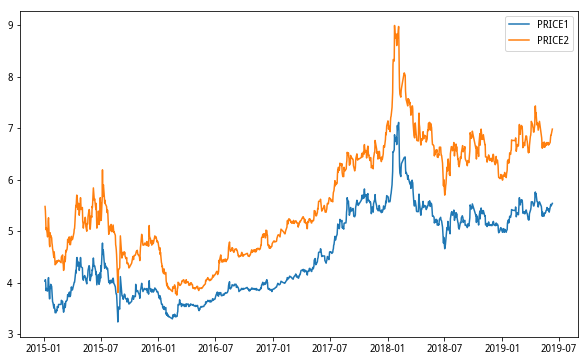

In [7]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,6))
plt.plot(price_df.index,price_df.close,label='PRICE1')
plt.plot(price_df2.index,price_df2.close,label='PRICE2')
plt.legend()  # 让图例生效
plt.show()

In [8]:
import statsmodels.api as sm
x = price_df.close
y = price_df2.close
#一元方程的非协整检验
coint_result = sm.tsa.stattools.coint(x, y)
# 【t-statistic,pvalue,（临界值分别为1%、5%和10%）】
print(coint_result)
print('='*40)
pvalue = coint_result[1]
print(pvalue)
print('='*40)

X = sm.add_constant(x) #增加常数项
#进行线性回归拟合
result = (sm.OLS(y,X)).fit()
# 回归系数
print('回归系数:{}'.format(result.params))
print('='*40)

coef = result.params[1]
print(coef)

(-2.6686371772249124, 0.21106078939744038, array([-3.9066283127209394, -3.3418038676377955, -3.0483866634425736]))
0.21106078939744038
回归系数:const   -0.379598
close    1.307414
dtype: float64
1.3074137576494014


In [9]:
df['y']= -0.379598+1.307414*df.close_x
df.head()

,open_x,high_x,low_x,close_x,open_y,high_y,low_y,close_y,y
2015-01-05,3.93,4.10,3.90,4.03,5.35,5.56,5.28,5.48,4.889280
2015-01-06,3.98,4.27,3.94,4.06,5.38,5.72,5.35,5.40,4.928503
2015-01-07,3.98,4.06,3.94,4.01,5.30,5.38,5.16,5.25,4.863132
2015-01-08,4.02,4.04,3.82,3.85,5.27,5.31,4.99,5.03,4.653946
2015-01-09,3.84,4.10,3.77,3.89,5.03,5.36,4.93,5.07,4.706242


In [11]:
df['y1']=result.fittedvalues
df.head()

,open_x,high_x,low_x,close_x,open_y,high_y,low_y,close_y,y,y1
2015-01-05,3.93,4.10,3.90,4.03,5.35,5.56,5.28,5.48,4.889280,4.889280
2015-01-06,3.98,4.27,3.94,4.06,5.38,5.72,5.35,5.40,4.928503,4.928502
2015-01-07,3.98,4.06,3.94,4.01,5.30,5.38,5.16,5.25,4.863132,4.863131
2015-01-08,4.02,4.04,3.82,3.85,5.27,5.31,4.99,5.03,4.653946,4.653945
2015-01-09,3.84,4.10,3.77,3.89,5.03,5.36,4.93,5.07,4.706242,4.706242


In [42]:
预测，注意加常数项1的元祖。
result.predict((1,4.03))

array([4.889279554380734])

In [12]:
#查看回归结果
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 3.358e+04
Date:                Tue, 17 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:16:29   Log-Likelihood:                 246.52
No. Observations:                1079   AIC:                            -489.0
Df Residuals:                    1077   BIC:                            -479.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3796      0.033    -11.486      0.0

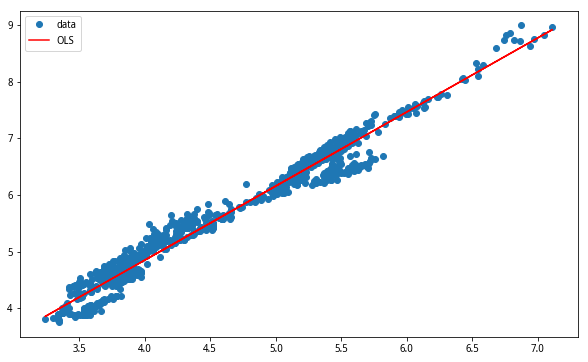

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, result.fittedvalues, 'r', label="OLS")
# ax.plot(df.close_x, df.y, 'b', label="OLS")
ax.legend(loc='best')

In [ ]:
# 进行正则化处理
def zscore(series):
    return (series - series.mean()) / np.std(series)

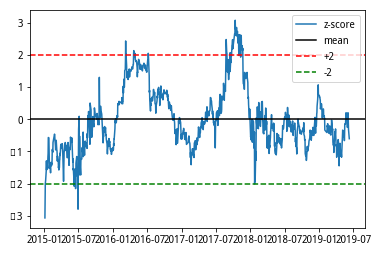

In [15]:
plot(zscore(df.y-df.close_y))
plt.axhline(zscore(df.y-df.close_y).mean(), color="black")
# plt.axhline(1.0, color="red", linestyle="--")
# plt.axhline(-1.0, color="green", linestyle="--")
plt.axhline(2.0, color="red", linestyle="--")
plt.axhline(-2.0, color="green", linestyle="--")
plt.legend(["z-score", "mean", "+2", "-2"])
plt.show()